## Bivariate plotting with pandas

* https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas/

**Scatter Plot** df.plot.scatter()

**Hex Plot** df.plot.hexbin()

**Stacked Bar Chart** df.plot.bar(stacked=True)

**Bivariate Line Chart** df.plot.line()

# Bivariate plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"/></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"/></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Hex Plot</td>
<td style="font-weight:bold; font-size:16px;">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px;">Bivariate Line Chart</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.hexbin()</td>
<td>df.plot.bar(stacked=True)</td>
<td>df.plot.line()</td>
</tr>
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
</table>

----

In [1]:
import pandas as pd
reviews = pd.read_csv("../data visualization/winemag-data_first150k.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Scatter plot

In [2]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

This plot shows us that price and points are weakly correlated: that is, that more expensive wines do generally earn more points when reviewed.

Note that in order to make effective use of this plot, we had to downsample our data, taking just 100 points from the full set. This is because naive scatter plots do not effectively treat points which map to the same place. For example, if two wines, both costing 100 dollars, get a rating of 90, then the second one is overplotted onto the first one, and we add just one point to the plot.

This isn't a problem if it happens just a few times. But with enough points the distribution starts to look like a shapeless blob, and you lose the forest for the trees:

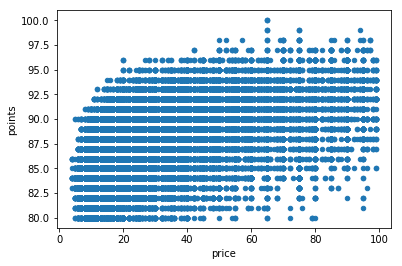

In [3]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

Because of their weakness to overplotting, scatter plots work best with relatively small datasets, and with variables which have a large number of unique values.

There are a few ways to deal with overplotting. We've already demonstrated one way: sampling the points. Another interesting way to do this that's built right into pandas is to use our next plot type, a hexplot.

## Hexplot

A Hex plot arregates points in space into hexagons, and then colors those hexagons based on the values within them:

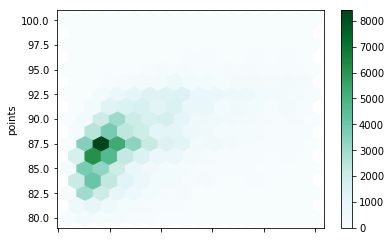

In [4]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

(note: the x-axis is points, but is missing from the chart due to a bug)

The data in this plot is directly comparable with that in the scatter plot from earlier, but the story it tells us is very different. From this hexplot we can see that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

We did not see this effect by looking at the scatter plot, because too many similarly-priced, similarly-scoring wines were overplotted. By doing away with this problem, this hexplot presents us a much more useful view of the dataset.

Hexplots and scatter plots can by applied to combinations of interval variables and/or ordinal categorical variables.

---

## Stacted plots

Scatter plots and hex plots are new. But we can also use the simpler plots we saw in the last notebook.

The easiest way to modify them to support another visual variable is by using stacking. A stacked chart is one which plots the variables one on top of the other.

We'll use a supplemental selection of the five most common wines for this next section.

wine_counts counts the number of times each of the possible review scores was received by the five most commonly reviewed types of wines:

In [5]:
wine_counts = pd.read_csv("../data visualization/top-five-wine-score-counts.csv", index_col=0)

In [6]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


Many pandas multivariate plots expect input data to be in this format, with one categorical variable in the columns, one categorical variable in the rows, and counts of their intersections in the entries.

Let's now look at some stacked plots. We'll start with the stacked bar chart.

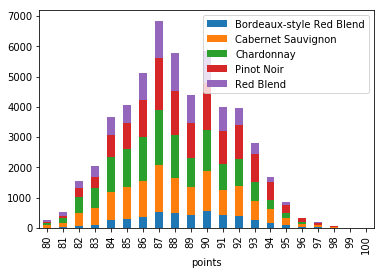

In [7]:
wine_counts.plot.bar(stacked=True)

Stacked bar plots share the strengths and weaknesses of univariate bar charts. They work best for nominal categorical or small ordinal categorical variables.

Another simple example is the area plot, which lends itself very naturally to this form of manipulation:

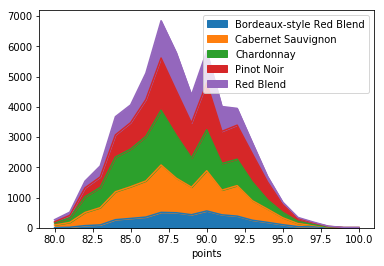

In [8]:
wine_counts.plot.area()

Like single-variable area charts, multivariate area charts are meant for nominal categorical or interval variables.

Stacked plots are visually very pretty. However, they have two major limitations.

The first limitation is that the second variable in a stacked plot must be a variable with a very limited number of possible values (probably an ordinal categorical, as here). Five different types of wine is a good number because it keeps the result interpretable; eight is sometimes mentioned as a suggested upper bound. Many dataset fields will not fit this critereon naturally, so you have to "make do", as here, by selecting a group of interest.

The second limitation is one of interpretability. As easy as they are to make, and as pretty as they look, stacked plots make it really hard to distinguish concrete values. For example, looking at the plots above, can you tell which wine got a score of 87 more often: Red Blends (in purple), Pinot Noir (in red), or Chardonnay (in green)? It's actually really hard to tell

---

## Bivariate line chart

One plot type we've seen already that remains highly effective when made bivariate is the line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.

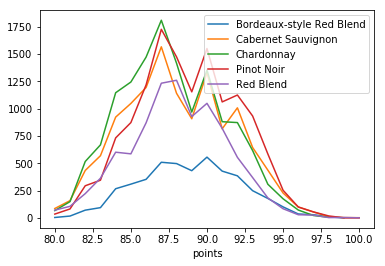

In [9]:
wine_counts.plot.line()

Using a line chart this way makes inroads against the second limitation of stacked plotting: interpretability. Bivariate line charts are much more interpretable because the lines themselves don't take up much space. Their values remain readable when we place multiple lines side-by-side, as here.

For example, in this chart we can easily answer our question from the previous example: which wine most commonly scores an 87. We can see here that the Chardonnay, in green, narrowly beats out the Pinot Noir, in red.

---

## Exercises

In this section of the tutorial we introduced and explored some common bivariate plot types:

* Scatter plots
* Hex plots
* Stacked bar charts and area charts
* Bivariate line charts

Let's now put what we've learned to the test!

To start off, try answering the following questions:

1. A scatter plot or hex plot is good for what two types of data?
2. What type of data makes sense to show in a stacked bar chart, but not in a bivariate line chart?
3. What type of data makes sense to show in a bivariate line chart, but not in a stacked bar chart?
4. Suppose we create a scatter plot but find that due to the large number of points it's hard to interpret. What are two things we can do to fix this issue?
---

1. numeral? 그런거 없었나, less data?
2. 
3. 
4. down sample, hexa

---

* Nominal variable - Without any particular implied order like say color of eyes- Black, blue, green, brown. There is no ranking or ordering to the colors

* Ordinal variable - Are categories with a natural ordering but the scale of difference is not defined. Example - Speed of a moving object - slow, medium, fast, super fast and ultra - fast. There is a natural ordering in it Slow < Medium < Fast < Super Fast < Ultra fast, but it does not imply that
Speed(Medium) - Speed(Slow) = Speed(Fast) - Speed(Medium)

* Interval - An interval variable is similar to an ordinal variable, except that the intervals between the values of the interval variable are equally spaced. -- For example, suppose you have a variable such as annual income that is measured in dollars, and we have three people who make 10,000 dollars, 15,000 dollars and 20,000 dollars. The second person makes 5,000 dollars more than the first person and 5,000 dollars less than the third person, and the size of these intervals is the same.  If there were two other people who make 90,000 dollars and 95,000 dollars, the size of that interval between these two people is also the same (5,000 dollars).


In [10]:
from IPython.display import HTML
HTML("""
<ol>
<li>Scatter plots and hex plots work best with a mixture of ordinal categorical and interval data.</li>
<br/>
<li>Nominal categorical data makes sense in a stacked bar chart, but not in a bivariate line chart.</li>
<br/>
<li>Interval data makes sense in a bivariate line chart, but not in a stacked bar chart.</li>
<br/>
<li>One way to fix this issue would be to sample the points. Another way to fix it would be to use a hex plot.</li>
</ol>
""")

Next, let's replicate some plots. Recall the Pokemon dataset from earlier:

In [11]:
pokemon = pd.read_csv("../data visualization/pokemon.csv", index_col=0)
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [12]:
pokemon2 = pd.read_csv("../data visualization/pokemonWithStats.csv", index_col=0)
pokemon2.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


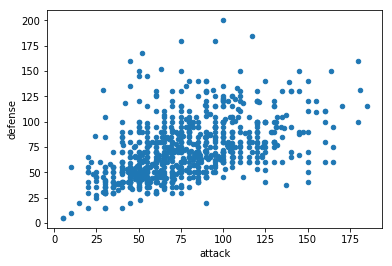

In [13]:
pokemon[pokemon['defense'] < 201].plot.scatter(x='attack', y='defense')

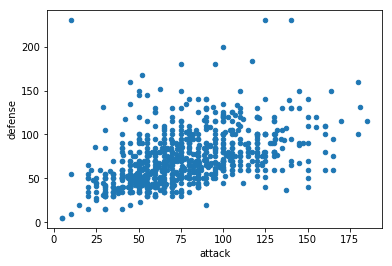

In [14]:
pokemon.plot.scatter(x='attack', y='defense')

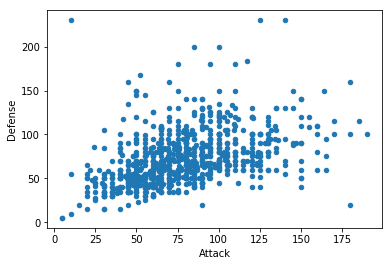

In [15]:
pokemon2.plot.scatter(x='Attack', y='Defense')

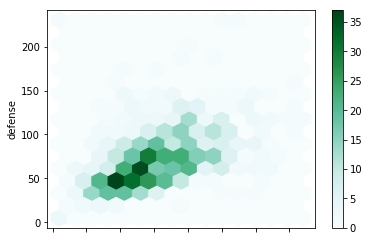

In [16]:
pokemon.plot.hexbin(x='attack', y='defense', gridsize=15)

For thee next plot, use the following data:

In [17]:
pokemon_stats_legendary = pokemon.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]

In [18]:
pokemon_stats_legendary2 = pokemon2.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]

In [29]:
pokemon_stats_legendary2 = pokemon2.groupby(['Generation','Legendary']).mean()[['Attack', 'Defense']]

In [31]:
pokemon_stats_legendary2

Attack     Defense
Generation Legendary                        
1          False       74.981250   70.175000
           True       120.833333   89.166667
2          False       70.693069   72.118812
           True        99.000000   99.000000
3          False       76.971831   69.901408
           True       118.333333  107.222222
4          False       79.620370   75.074074
           True       109.846154  103.538462
5          False       78.246667   70.486667
           True       120.266667   90.733333
6          False       70.459459   74.013514
           True       125.250000  101.375000

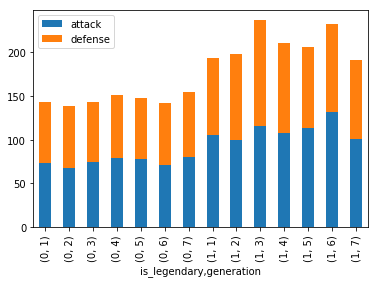

In [20]:
pokemon_stats_legendary.plot.bar(stacked=True)

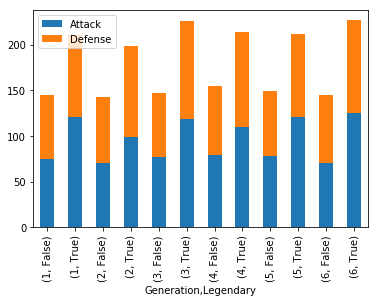

In [30]:
pokemon_stats_legendary2.plot.bar(stacked=True)

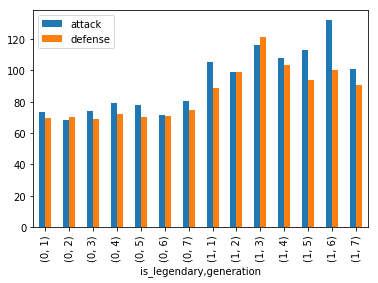

In [22]:
pokemon_stats_legendary.plot.bar(stacked=False)

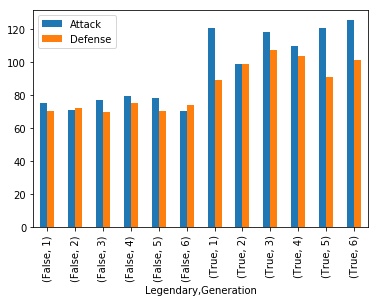

In [23]:
pokemon_stats_legendary2.plot.bar(stacked=False)

For the next plot, use the following data:

In [24]:
pokemon_stats_by_generation = pokemon.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

In [25]:
pokemon_stats_by_generation2 = pokemon2.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

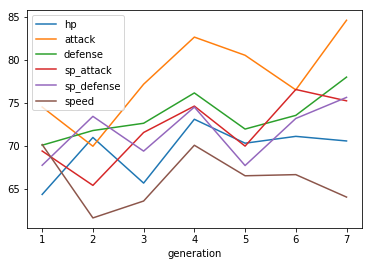

In [26]:
pokemon_stats_by_generation.plot.line()

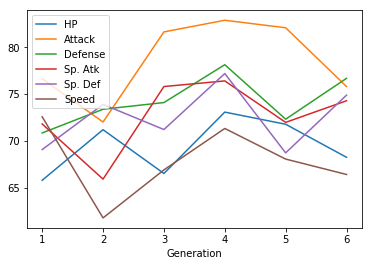

In [27]:
pokemon_stats_by_generation2.plot.line()

## Conclusion

In this section we introduced and explored some common bivariate plot types:

* Scatter plots
* Hex plots
* Stacked bar charts and area charts
* Bivariate line charts

In the next section we will move on to exploring another plotting library, `seaborn`, which compliments `pandas` with many more advanced data visualization tools for you to use.
